In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## 다음도 스타일 주는법
import matplotlib
matplotlib.style.use('ggplot') 
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [1]:
file_npy = '/ref/analysis/Cre/tophat/merge_all/1.pairedend_contiguity.np.npy'
file_pk = '/ref/analysis/pipelines/pandas_df/Creinhardtii_281_v5.5.gene.gff3.pandas.df.pk'
file_cm = '/ref/analysis/Cre/tophat/merge_all/chromosome.map.txt'

In [95]:
df_cm = pd.read_csv(file_cm,sep='\t',header=None)
df_cm_ix_chr2n = df_cm.set_index(0)
df_cm_ix_n2chr = df_cm.set_index(1)

In [10]:
array_contiguity = np.load(file_npy)

In [11]:
df_gff_cre = pd.read_pickle(file_pk)

In [12]:
df_gff_cre.head()

0             1               2      3  \
genename           longest                                                      
NaN                NaN      chromosome_1  phytozomev10            gene  18766   
Cre01.g000017.v5.5 1        chromosome_1  phytozomev10            mRNA  18766   
                   1        chromosome_1  phytozomev10  five_prime_UTR  18766   
                   1        chromosome_1  phytozomev10             CDS  19163   
                   1        chromosome_1  phytozomev10             CDS  19329   

                                4  5  6  7  \
genename           longest                   
NaN                NaN      20237  .  +  .   
Cre01.g000017.v5.5 1        20237  .  +  .   
                   1        19162  .  +  .   
                   1        19178  .  +  0   
                   1        19948  .  +  2   

                                                                            8  \
genename           longest                                                      
NaN                NaN               ID=Cre01.g000017.v5.5;Name=Cre01.g000017   
Cre01.g000017.v5.5 1        ID=Cre01.g000017.t1.1.v5.5;Name=Cre01.g000017....   
                   1        ID=Cre01.g000017.t1.1.v5.5.five_prime_UTR.1;Pa...   
                   1        ID=Cre01.g000017.t1.1.v5.5.CDS.1;Parent=Cre01....   
                   1        ID=Cre01.g000017.t1.1.v5.5.CDS.2;Parent=Cre01....   

                                     transcriptname  
genename           longest                           
NaN                NaN                         None  
Cre01.g000017.v5.5 1        Cre01.g000017.t1.1.v5.5  
                   1        Cre01.g000017.t1.1.v5.5  
                   1        Cre01.g000017.t1.1.v5.5  
                   1        Cre01.g000017.t1.1.v5.5

In [13]:
left,right = min(df_gff_cre.loc[('Cre10.g418450.v5.5','1')][3]),max(df_gff_cre.loc[('Cre10.g418450.v5.5','1')][4])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


In [14]:
dic = {'mRNA'       : [],
       'length'     : [],
       'contiguity' : [],
       'ratio.zero' : [],
       'total.depth': [],
       'ratio.depth': []
      }
genelist = set([x for x,y in df_gff_cre.index])
for genename in genelist:
    try:
        if math.isnan(float(genename)):
            continue
    except ValueError:
        pass
    #print type(genename)
    df      = df_gff_cre.loc[genename]
    mask    = (df[2]=='mRNA')
    df_mRNA = df[mask].loc['1']
    
    chromosome = df_mRNA[0] 
    left       = int(df_mRNA[3])
    right      = int(df_mRNA[4])
    length     = right - left + 1 
    echr       = df_cm_ix.loc[chromosome][1]
    #print echr,chromosome
    #print left,right
    contiguity = array_contiguity[echr][left-1:right-1]
    zeropart   = list(contiguity).count(0)
    #if min(contiguity) == 0:
    if 1:
        dic['mRNA'].append(genename)
        dic['contiguity'].append(contiguity)
        dic['ratio.zero'].append(float(zeropart)/float(length))
        dic['length'].append(length)
        dic['total.depth'].append(sum(contiguity))
        dic['ratio.depth'].append(float(sum(contiguity))/float(length))
        
    

In [15]:
df_cont = pd.DataFrame(dic)

In [16]:
df_cont.sort_values(by='length',ascending=False).head()

,contiguity,length,mRNA,ratio.depth,ratio.zero,total.depth
8780,"[212, 212, 212, 212, 212, 212, 212, 212, 212, ...",108652,Cre02.g141086.v5.5,62.444216,0.934783,6784689
2776,"[13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...",82983,Cre10.g449750.v5.5,71.693528,0.113746,5949344
16935,"[19, 20, 22, 22, 22, 22, 22, 22, 22, 23, 24, 2...",62112,Cre10.g451600.v5.5,210.449623,0.000064,13071447
12136,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",59292,Cre10.g458350.v5.5,84.228665,0.073922,4994086
9301,"[357, 363, 377, 406, 462, 557, 571, 578, 581, ...",59226,Cre02.g082825.v5.5,71.382923,0.959004,4227725


In [17]:
df_cont_ix = df_cont.set_index('mRNA')

In [18]:
mask = (df_cont_ix['ratio.depth'] > 100) & (df_cont_ix['ratio.zero'] > 0.1 )
df_cont_ix[mask].head()

,contiguity,length,ratio.depth,ratio.zero,total.depth
mRNA,,,,,
Cre10.g418450.v5.5,"[4316, 5418, 6734, 6865, 7406, 10049, 10915, 1...",1726,39254.230591,0.273465,67752802
Cre12.g548200.v5.5,"[270, 271, 271, 271, 271, 273, 274, 274, 276, ...",5916,263.423259,0.156356,1558412
Cre03.g197500.v5.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4052,5201.485686,0.121175,21076420
Cre02.g085150.v5.5,"[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 9...",10216,127.415623,0.159358,1301678
Cre01.g041855.v5.5,"[210, 219, 228, 235, 297, 337, 327, 334, 342, ...",2932,434.331514,0.284447,1273460


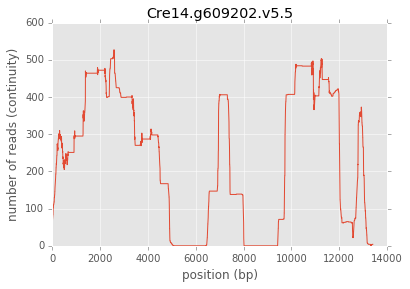

In [269]:
genename = 'Cre14.g609202.v5.5'
y = df_cont_ix.loc[genename]['contiguity']
x = np.arange(len(y))
plt.title(genename)
plt.ylabel('number of reads (continuity)')
plt.xlabel('position (bp)')
plt.plot(x,y)

In [20]:
df_cont_ix.loc['Cre06.g293700.v5.5'].values[0][50:]

array([521, 525, 529, ..., 216, 178, 163])

In [21]:
## continuous genomic regions retrieval 
rows,columns = np.shape(array_contiguity)

In [177]:
def get_block(array,depth_cut=10):
    lim_len_block = 100
    #depth_cut     = 0 # 최소한 10개 리드는 초과 해야 인정
    block_list = []
    #print(len(np.shape(array)))
    if len(np.shape(array)) == 1:
        rows = 1
        block = []
        for n,j in enumerate(array):
            if j > depth_cut:
                block.append(n)
            else:
                if len(block) > lim_len_block:
                    block_list.append([block[0],block[-1]])
                    block = []
                else:
                    block = []
    else: 
        rows, columns = np.shape(array)       
        for i in range(rows):
            earray = array[i]
            block = []
            for n,j in enumerate(earray):
                if j > depth_cut:
                    block.append(n)
                else:
                    if len(block) > lim_len_block:
                        block_list.append([i,block[0],block[-1]])
                        block = []
                    else:
                        block = []
    return block_list


In [180]:
def get_genename(chromosome,left,right):
    gene_list = []
    if str(type(df_gff_cre_gene.loc[chromosome])) == "<class 'pandas.core.frame.DataFrame'>":
        df = df_gff_cre_gene.loc[chromosome].reset_index()
        for i in df.index:
            #print(df.loc[i])
            g_left  = df.loc[i][3]
            g_right = df.loc[i][4]
            if (left < g_left < right) or (left < g_right < right):
                gene_list.append(df.loc[i]['genename'])
            elif right < g_left:
                break
    else:
        series = df_gff_cre_gene.loc[chromosome]
        g_left  = series[3]
        g_right = series[4]
        if (left < g_left < right) or (left < g_right < right):
            gene_list.append(series['genename'])
    return gene_list

In [137]:
df_gff_cre_row = df_gff_cre.reset_index()
mask = (df_gff_cre_row[2] == 'mRNA') & (df_gff_cre_row['longest'] == '1')
df_gff_cre_gene = df_gff_cre_row[mask].set_index(0)
str(type(df_gff_cre_gene.loc['chromosome_1']))

"<class 'pandas.core.frame.DataFrame'>"

In [178]:
block_list_cont = get_block(array_contiguity)

In [23]:
array_genemodel = np.zeros([rows,columns],dtype=np.int)

In [24]:
df_gff_cre.sortlevel(inplace=True)

In [25]:
genenames = set(df_gff_cre.index.get_level_values('genename'))

In [26]:
genenames = list(genenames)[1:]

In [27]:
for gene in genenames:
    chromosome = df_gff_cre.loc[(gene,'1')][0]
    left,right = min(df_gff_cre.loc[(gene,'1')][3]),max(df_gff_cre.loc[(gene,'1')][4])
    echr       = df_cm_ix.loc[chromosome]
    array_genemodel[echr,int(left-1):int(right)-1] += 1 

In [181]:
# Merge list
result = []
for echr, left, right in block_list_cont:
    inside_existence = get_block(array_genemodel[echr][left:right],depth_cut=0)
    if len(inside_existence) > 0:
        #print(echr)
        #print(echr,left,right,get_genename(df_cm_ix_n2chr.loc[echr][0],left,right), inside_existence)
        result.append([echr,left,right,get_genename(df_cm_ix_n2chr.loc[echr][0],left,right), inside_existence])

In [210]:
merge_list_mayra_pcr = []
for r in result:
    genelist = r[3]
    score_right = 0 
    score_pred  = 0 
    for gene in genelist:
        if '.'.join(gene.split('.')[0:2]) in right_sized_genes:
            score_right += 1 
        if '.'.join(gene.split('.')[0:2]) in genelist_predicted_merge:
            score_pred += 1 
            #print(gene, r)
    if score_pred >1 and score_right > 0:
        if r in merge_list_mayra_pcr:
            pass
        else:
            merge_list_mayra_pcr.append(r)


In [211]:
merge_list_mayra_pcr

[[0,
  2094250,
  2105915,
  ['Cre01.g011300.v5.5',
   'Cre01.g011350.v5.5',
   'Cre01.g011376.v5.5',
   'Cre01.g011400.v5.5'],
  [[20, 5708], [5765, 9139], [9215, 10845]]],
 [0,
  2453537,
  2464457,
  ['Cre01.g013800.v5.5', 'Cre01.g013801.v5.5', 'Cre01.g013850.v5.5'],
  [[0, 3383], [3439, 8289], [8293, 10877]]],
 [0,
  2955172,
  2963548,
  ['Cre01.g018050.v5.5', 'Cre01.g018075.v5.5', 'Cre01.g018100.v5.5'],
  [[0, 3144], [3204, 5124], [5128, 8352]]],
 [0,
  3509487,
  3513724,
  ['Cre01.g022450.v5.5', 'Cre01.g022462.v5.5', 'Cre01.g022500.v5.5'],
  [[0, 529], [579, 2249]]],
 [0,
  5532353,
  5546592,
  ['Cre01.g039200.v5.5',
   'Cre01.g039250.v5.5',
   'Cre01.g039300.v5.5',
   'Cre01.g039350.v5.5'],
  [[0, 1832], [1882, 4532], [4971, 10420]]],
 [0,
  6400245,
  6424891,
  ['Cre01.g045601.v5.5', 'Cre01.g045640.v5.5', 'Cre01.g045650.v5.5'],
  [[41, 15135], [15192, 21355]]],
 [0,
  6696915,
  6706397,
  ['Cre01.g048102.v5.5', 'Cre01.g048150.v5.5'],
  [[4, 6918], [6970, 9468]]],
 [0,
  72

In [226]:
# Split list
result_split = []
df = df_gff_cre_gene.reset_index()
for i in df.index:
    genename = df.loc[i]['genename']
    echr = df_cm_ix_chr2n.loc[df.loc[i][0]]
    left = df.loc[i][3]
    right = df.loc[i][4]
    inside_existence = get_block(array_contiguity[echr][left:right],depth_cut=1)
    if len(inside_existence) > 0:
        #print(echr)
        #print(echr,left,right,get_genename(df_cm_ix_n2chr.loc[echr][0],left,right), inside_existence)
        result_split.append([genename, echr,left,right, inside_existence])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [233]:
split_list_predicted = []
for r in result_split:
    gene = r[0]
    score_right = 0 
    score_pred  = 0 
    if '.'.join(gene.split('.')[0:2]) in split_predicted:
        score_pred += 1 
        #print(gene, r)
    if score_pred >0:
        if r in split_list_predicted:
            pass
        else:
            split_list_predicted.append(r)

In [266]:
large_gene_split = [x for x in split_list_predicted if (x[3] - x[2]) > 10000]
large_gene_split = [x for x in large_gene_split if 100 < df_cont_ix.loc[x[0]]['ratio.depth'] <1000]
#large_gene_split[0][4]

def between_gap_max(inlist):
    result = []
    for n,each in enumerate(inlist):
        try:
            result.append(inlist[n+1][0] - each[1])
        except IndexError:
            continue
    if len(result) > 0:
        return(max(result))
    else: return 0
large_gene_split.sort(key=lambda x:between_gap_max(x[4]),reverse=True)
#large_gene_split.sort(key=lambda x:df_cont_ix.loc[x[0]]['ratio.depth'],reverse=True)

In [267]:
large_gene_split

[['Cre08.g373050.v5.5', 1    15
  Name: chromosome_8, dtype: int64, 2629396, 2653256, [[5, 4095],
   [5871, 10437],
   [10510, 11760],
   [11918, 14404],
   [14626, 14913]]],
 ['Cre16.g667700.v5.5', 1    7
  Name: chromosome_16, dtype: int64, 4322800, 4334885, [[0, 2093],
   [2110, 2446],
   [2639, 5589],
   [7343, 7606],
   [7707, 11841]]],
 ['Cre17.g729400.v5.5', 1    8
  Name: chromosome_17, dtype: int64, 4087516, 4101357, [[0, 3621],
   [5263, 9999]]],
 ['Cre14.g609202.v5.5', 1    5
  Name: chromosome_14, dtype: int64, 218628, 232029, [[0, 5039],
   [6439, 8009],
   [9420, 13303]]],
 ['Cre16.g654600.v5.5', 1    7
  Name: chromosome_16, dtype: int64, 1662676, 1678650, [[470, 4442],
   [5459, 10795],
   [10836, 13031],
   [13316, 15184]]],
 ['Cre15.g635800.v5.5', 1    6
  Name: chromosome_15, dtype: int64, 328743, 341616, [[23, 4407],
   [5291, 5501]]],
 ['Cre01.g046052.v5.5', 1    0
  Name: chromosome_1, dtype: int64, 6467953, 6478194, [[0, 3031],
   [3118, 3876],
   [3919, 4065],
 

In [223]:
df.loc[0]['genename']

'Cre01.g000017.v5.5'

In [216]:
df_gff_cre_gene.head()

,genename,longest,1,2,3,4,5,6,7,8,transcriptname
0,,,,,,,,,,,
chromosome_1,Cre01.g000017.v5.5,1,phytozomev10,mRNA,18766,20237,.,+,.,ID=Cre01.g000017.t1.1.v5.5;Name=Cre01.g000017....,Cre01.g000017.t1.1.v5.5
chromosome_1,Cre01.g000033.v5.5,1,phytozomev10,mRNA,20356,23957,.,+,.,ID=Cre01.g000033.t1.1.v5.5;Name=Cre01.g000033....,Cre01.g000033.t1.1.v5.5
chromosome_1,Cre01.g000050.v5.5,1,phytozomev10,mRNA,24026,30617,.,+,.,ID=Cre01.g000050.t1.1.v5.5;Name=Cre01.g000050....,Cre01.g000050.t1.1.v5.5
chromosome_1,Cre01.g000100.v5.5,1,phytozomev10,mRNA,30776,41037,.,+,.,ID=Cre01.g000100.t1.1.v5.5;Name=Cre01.g000100....,Cre01.g000100.t1.1.v5.5
chromosome_1,Cre01.g000150.v5.5,1,phytozomev10,mRNA,41896,46547,.,+,.,ID=Cre01.g000150.t1.2.v5.5;Name=Cre01.g000150....,Cre01.g000150.t1.2.v5.5


In [156]:
# mayra list
file_mayra_pcr = '/ref/analysis/Cre/mayra/mayra.pcr.list.txt'
df_mayra_pcr   = pd.read_csv(file_mayra_pcr,sep='\t') 

file_mayra_plate = '/ref/analysis/Cre/mayra/mayra.plate.index.txt'
df_mayra_plate   = pd.read_csv(file_mayra_plate,sep='\t') 
df_mayra_plate.set_index(['platename','Pos.Nr'],inplace=True)
def get_genename(df):
    x = df['platename']
    y = df['Pos.Nr']
    genename = df_mayra_plate.loc[(x,y)]['ChlreGene_ID55']
    return genename
df_mayra_pcr['genename'] = df_mayra_pcr.apply(get_genename,axis=1)
df_mayra_pcr_ix = df_mayra_pcr.set_index('genename')

In [158]:
mask        = (df_mayra_pcr['right size'] == 1)
right_sized = df_mayra_pcr[mask]

In [163]:
right_sized_genes = list(right_sized['genename'])

In [99]:
df_cm_ix_n2chr.loc[0][0]

'chromosome_1'

In [52]:
len(np.shape(array_genemodel[0,175303:175777]))

1

In [29]:
len(block_list)

25093

In [31]:
def comp(a,b):
    if a==0 and b==0:
        return 0
    elif a>0 and b>0:
        return 3
    elif a>0 and b==0:
        return 1
    elif a==0 and b>0:
        return 2
comp_vec = np.vectorize(comp)

In [32]:
s,e = 1599023,1622938
a = array_contiguity[0,s:e]
b = array_genemodel[0,s:e]
r = comp_vec(a,b)

In [33]:
mask = (r<2)
r[mask]

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
array_comp = np.zeros([rows,columns],dtype=np.int)
for row in range(rows):
    array_comp[row,:] = comp_vec(array_contiguity[row,:],array_genemodel[row,:])

In [35]:
array_comp

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
df_gff_cre.head()

0             1     2      3      4  5  6  7  \
genename longest                                                            
NaN      NaN      chromosome_1  phytozomev10  gene  18766  20237  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  20356  23957  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  24026  30617  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  30776  41037  .  +  .   
         NaN      chromosome_1  phytozomev10  gene  41896  46547  .  +  .   

                                                         8 transcriptname  
genename longest                                                           
NaN      NaN      ID=Cre01.g000017.v5.5;Name=Cre01.g000017           None  
         NaN      ID=Cre01.g000033.v5.5;Name=Cre01.g000033           None  
         NaN      ID=Cre01.g000050.v5.5;Name=Cre01.g000050           None  
         NaN      ID=Cre01.g000100.v5.5;Name=Cre01.g000100           None  
         NaN      ID=Cre01.g000150.v5.5;Name=Cre01.g000150           None

In [39]:
block_list = get_block(array_comp)

In [41]:
len(block_list)

10309

In [184]:
merged_predicted = '''['Cre13.g572250.t1.1.v5.5', 'Cre13.g572272.t1.2.v5.5']
['Cre07.g325753.t1.1.v5.5', 'Cre07.g325754.t1.1.v5.5']
['Cre17.g714300.t1.2.v5.5', 'Cre17.g714350.t1.1.v5.5']
['Cre04.g223850.t1.2.v5.5', 'Cre04.g223876.t1.1.v5.5']
['Cre01.g026016.t1.1.v5.5', 'Cre01.g026050.t1.1.v5.5']
['Cre06.g302305.t1.2.v5.5', 'Cre06.g302350.t1.1.v5.5']
['Cre12.g513700.t1.1.v5.5', 'Cre12.g513701.t1.2.v5.5']
['Cre02.g141766.t1.1.v5.5', 'Cre02.g141786.t1.1.v5.5']
['Cre10.g439350.t1.2.v5.5', 'Cre10.g439400.t1.1.v5.5']
['Cre07.g318400.t1.1.v5.5', 'Cre07.g318426.t1.1.v5.5']
['Cre06.g253753.t1.1.v5.5', 'Cre06.g253754.t1.1.v5.5']
['Cre01.g016500.t1.1.v5.5', 'Cre01.g016514.t1.1.v5.5']
['Cre11.g467532.t3.1.v5.5', 'Cre11.g467533.t1.1.v5.5']
['Cre06.g266383.t1.1.v5.5', 'Cre06.g266416.t1.1.v5.5']
['Cre06.g306050.t1.1.v5.5', 'Cre06.g306057.t1.2.v5.5']
['Cre13.g582734.t1.1.v5.5', 'Cre13.g582755.t1.1.v5.5']
['Cre15.g643391.t1.1.v5.5', 'Cre15.g643392.t1.1.v5.5']
['Cre10.g425675.t1.1.v5.5', 'Cre10.g425700.t1.2.v5.5']
['Cre04.g224826.t1.1.v5.5', 'Cre04.g224850.t1.1.v5.5']
['Cre09.g393580.t1.1.v5.5', 'Cre09.g393617.t1.1.v5.5']
['Cre07.g322376.t1.1.v5.5', 'Cre07.g322400.t1.1.v5.5']
['Cre12.g559600.t1.1.v5.5', 'Cre12.g559704.t1.1.v5.5']
['Cre09.g399141.t1.1.v5.5', 'Cre09.g399178.t1.1.v5.5']
['Cre12.g528250.t1.1.v5.5', 'Cre12.g528300.t1.1.v5.5']
['Cre07.g319226.t1.1.v5.5', 'Cre07.g319250.t1.1.v5.5']
['Cre11.g480700.t1.1.v5.5', 'Cre11.g480725.t1.1.v5.5']
['Cre11.g474900.t1.2.v5.5', 'Cre11.g474950.t1.1.v5.5']
['Cre05.g246552.t1.1.v5.5', 'Cre05.g246553.t2.1.v5.5']
['Cre17.g699926.t1.1.v5.5', 'Cre17.g699950.t1.1.v5.5']
['Cre01.g025000.t1.2.v5.5', 'Cre01.g025025.t1.1.v5.5']
['Cre10.g455100.t1.1.v5.5', 'Cre10.g455150.t1.2.v5.5']
['Cre07.g329150.t1.2.v5.5', 'Cre07.g329200.t1.2.v5.5', 'Cre07.g329217.t1.1.v5.5', 'Cre07.g329233.t1.1.v5.5']
['Cre16.g669450.t1.1.v5.5', 'Cre16.g669452.t1.1.v5.5']
['Cre01.g027550.t1.1.v5.5', 'Cre01.g027575.t1.1.v5.5']
['Cre16.g650400.t1.1.v5.5', 'Cre16.g650425.t1.1.v5.5']
['Cre12.g485418.t1.1.v5.5', 'Cre12.g485438.t1.1.v5.5']
['Cre02.g141166.t1.1.v5.5', 'Cre02.g141186.t1.1.v5.5']
['Cre11.g467762.t1.1.v5.5', 'Cre11.g467763.t1.1.v5.5']
['Cre13.g571902.t1.1.v5.5', 'Cre13.g571927.t1.1.v5.5']
['Cre02.g116250.t1.1.v5.5', 'Cre02.g116300.t1.2.v5.5']
['Cre08.g362550.t1.2.v5.5', 'Cre08.g362600.t1.2.v5.5']
['Cre07.g331450.t1.1.v5.5', 'Cre07.g331475.t1.1.v5.5']
['Cre12.g501400.t1.1.v5.5', 'Cre12.g501403.t1.2.v5.5']
['Cre18.g748947.t1.1.v5.5', 'Cre18.g748997.t1.1.v5.5']
['Cre02.g078950.t1.1.v5.5', 'Cre02.g079004.t1.1.v5.5']
['Cre02.g142967.t1.1.v5.5', 'Cre02.g142987.t1.1.v5.5']
['Cre04.g214769.t1.1.v5.5', 'Cre04.g216500.t1.1.v5.5']
['Cre05.g241644.t1.1.v5.5', 'Cre05.g241645.t1.1.v5.5']
['Cre11.g467645.t1.1.v5.5', 'Cre11.g467646.t1.1.v5.5']
['Cre15.g641674.t1.1.v5.5', 'Cre15.g641700.t1.1.v5.5']
['Cre10.g457228.t1.1.v5.5', 'Cre10.g457262.t1.1.v5.5']
['Cre12.g515400.t1.1.v5.5', 'Cre12.g515426.t1.1.v5.5']
['Cre12.g507005.t1.1.v5.5', 'Cre12.g507006.t1.1.v5.5']
['Cre03.g204050.t1.1.v5.5', 'Cre03.g204100.t1.1.v5.5']
['Cre17.g718450.t1.1.v5.5', 'Cre17.g718468.t1.2.v5.5']
['Cre17.g701800.t1.1.v5.5', 'Cre17.g701809.t1.2.v5.5']
['Cre06.g303171.t1.2.v5.5', 'Cre06.g303183.t1.2.v5.5']
['Cre10.g461300.t1.1.v5.5', 'Cre10.g461319.t1.2.v5.5']
['Cre02.g083050.t1.1.v5.5', 'Cre02.g083065.t1.2.v5.5']
['Cre06.g276350.t1.1.v5.5', 'Cre06.g276371.t1.2.v5.5']
['Cre02.g074720.t1.1.v5.5', 'Cre02.g074737.t1.2.v5.5', 'Cre02.g074758.t2.1.v5.5']
['Cre07.g357450.t1.1.v5.5', 'Cre07.g357486.t1.2.v5.5']
['Cre17.g734789.t1.1.v5.5', 'Cre17.g734805.t1.1.v5.5']
['Cre02.g074400.t1.1.v5.5', 'Cre02.g074437.t1.1.v5.5', 'Cre02.g074474.t1.1.v5.5']
['Cre05.g243453.t1.1.v5.5', 'Cre05.g243454.t1.1.v5.5']
['Cre02.g073150.t1.2.v5.5', 'Cre02.g073176.t1.1.v5.5']
['Cre09.g414100.t1.2.v5.5', 'Cre09.g414150.t2.1.v5.5']
['Cre12.g542100.t1.2.v5.5', 'Cre12.g542150.t1.2.v5.5']
['Cre09.g412880.t1.1.v5.5', 'Cre09.g412910.t2.1.v5.5']
['Cre17.g740300.t1.1.v5.5', 'Cre17.g740323.t1.1.v5.5']
['Cre10.g449127.t1.2.v5.5', 'Cre10.g449138.t1.1.v5.5']
['Cre08.g358544.t1.1.v5.5', 'Cre08.g358545.t1.1.v5.5']
['Cre11.g478400.t1.1.v5.5', 'Cre11.g478450.t1.1.v5.5']
['Cre02.g095250.t1.1.v5.5', 'Cre02.g095294.t1.2.v5.5']
['Cre16.g672453.t1.1.v5.5', 'Cre16.g672454.t1.1.v5.5']
['Cre13.g565301.t1.1.v5.5', 'Cre13.g565311.t1.1.v5.5']
['Cre02.g142847.t1.1.v5.5', 'Cre02.g142867.t1.1.v5.5']
['Cre09.g396363.t1.1.v5.5', 'Cre09.g396401.t1.1.v5.5']
['Cre02.g095085.t1.1.v5.5', 'Cre02.g095086.t1.1.v5.5']
['Cre13.g577650.t1.1.v5.5', 'Cre13.g577700.t1.2.v5.5']
['Cre07.g351800.t1.1.v5.5', 'Cre07.g351825.t1.1.v5.5']
['Cre05.g238260.t1.1.v5.5', 'Cre05.g238270.t1.1.v5.5']
['Cre10.g426050.t1.2.v5.5', 'Cre10.g426102.t1.1.v5.5']
['Cre03.g153300.t1.1.v5.5', 'Cre03.g153306.t1.2.v5.5']
['Cre08.g378400.t1.2.v5.5', 'Cre08.g378417.t1.1.v5.5']
['Cre03.g184850.t1.1.v5.5', 'Cre03.g184900.t1.2.v5.5']
['Cre01.g053350.t1.1.v5.5', 'Cre01.g053360.t1.2.v5.5']
['Cre09.g406500.t2.1.v5.5', 'Cre09.g406550.t1.2.v5.5']
['Cre03.g153800.t1.1.v5.5', 'Cre03.g153850.t1.2.v5.5']
['Cre16.g696000.t1.2.v5.5', 'Cre16.g696050.t1.1.v5.5']
['Cre10.g420561.t1.2.v5.5', 'Cre10.g420600.t1.1.v5.5']
['Cre06.g248850.t1.1.v5.5', 'Cre06.g248900.t1.1.v5.5']
['Cre17.g696600.t1.1.v5.5', 'Cre17.g696626.t1.1.v5.5', 'Cre17.g696650.t1.1.v5.5', 'Cre17.g696700.t1.2.v5.5']
['Cre10.g445395.t1.1.v5.5', 'Cre10.g445419.t1.1.v5.5']
['Cre09.g398512.t1.1.v5.5', 'Cre09.g398549.t1.1.v5.5']
['Cre02.g102276.t1.1.v5.5', 'Cre02.g102300.t1.2.v5.5']
['Cre12.g508300.t1.1.v5.5', 'Cre12.g508302.t1.1.v5.5']
['Cre01.g021400.t1.2.v5.5', 'Cre01.g021450.t2.1.v5.5']
['Cre06.g287800.t1.2.v5.5', 'Cre06.g287850.t2.1.v5.5']
['Cre13.g570751.t1.1.v5.5', 'Cre13.g570801.t1.1.v5.5']
['Cre17.g709876.t1.1.v5.5', 'Cre17.g709900.t1.1.v5.5']
['Cre03.g181900.t1.2.v5.5', 'Cre03.g181950.t1.1.v5.5']
['Cre12.g526240.t1.1.v5.5', 'Cre12.g526250.t1.2.v5.5']
['Cre15.g638650.t1.1.v5.5', 'Cre15.g638700.t1.1.v5.5']
['Cre06.g297900.t1.1.v5.5', 'Cre06.g297904.t1.2.v5.5']
['Cre14.g617002.t1.1.v5.5', 'Cre14.g617027.t1.1.v5.5']
['Cre04.g217200.t1.1.v5.5', 'Cre04.g217220.t1.1.v5.5', 'Cre04.g217240.t1.1.v5.5']
['Cre16.g687900.t1.2.v5.5', 'Cre16.g687901.t1.1.v5.5']
['Cre18.g748697.t1.1.v5.5', 'Cre18.g748747.t1.1.v5.5']
['Cre16.g659667.t1.1.v5.5', 'Cre16.g659700.t1.2.v5.5']
['Cre12.g502650.t1.1.v5.5', 'Cre12.g502678.t1.2.v5.5']
['Cre02.g113751.t1.2.v5.5', 'Cre02.g113752.t1.2.v5.5']
['Cre05.g235018.t1.1.v5.5', 'Cre05.g235060.t1.1.v5.5']
['Cre17.g728850.t1.1.v5.5', 'Cre17.g728864.t1.2.v5.5']
['Cre13.g588386.t1.1.v5.5', 'Cre13.g588405.t1.2.v5.5']
['Cre16.g691351.t1.1.v5.5', 'Cre16.g691352.t1.1.v5.5']
['Cre02.g104126.t1.1.v5.5', 'Cre02.g104150.t1.1.v5.5']
['Cre08.g374400.t1.1.v5.5', 'Cre08.g374436.t1.2.v5.5']
['Cre14.g610566.t1.1.v5.5', 'Cre14.g610582.t1.1.v5.5']
['Cre07.g316500.t1.1.v5.5', 'Cre07.g316526.t1.2.v5.5']
['Cre07.g352250.t1.1.v5.5', 'Cre07.g352251.t1.1.v5.5']
['Cre01.g005651.t1.1.v5.5', 'Cre01.g005701.t1.2.v5.5']
['Cre06.g257150.t1.2.v5.5', 'Cre06.g257167.t1.1.v5.5']
['Cre09.g388838.t1.1.v5.5', 'Cre09.g388875.t1.1.v5.5']
['Cre06.g268650.t1.1.v5.5', 'Cre06.g268700.t1.1.v5.5']
['Cre09.g402923.t1.1.v5.5', 'Cre09.g402960.t1.1.v5.5']
['Cre12.g508050.t1.2.v5.5', 'Cre12.g508100.t1.1.v5.5']
['Cre21.g752147.t1.1.v5.5', 'Cre21.g752197.t1.1.v5.5']
['Cre03.g148700.t1.2.v5.5', 'Cre03.g148750.t1.2.v5.5']
['Cre03.g145027.t1.1.v5.5', 'Cre03.g145047.t1.1.v5.5', 'Cre03.g145067.t1.1.v5.5']
['Cre11.g467787.t1.1.v5.5', 'Cre11.g467788.t1.1.v5.5']
['Cre10.g425100.t1.2.v5.5', 'Cre10.g425150.t1.1.v5.5']
['Cre13.g574100.t1.1.v5.5', 'Cre13.g574150.t1.1.v5.5']
['Cre16.g663776.t1.1.v5.5', 'Cre16.g663800.t1.2.v5.5']
['Cre04.g224667.t1.1.v5.5', 'Cre04.g224683.t1.1.v5.5']
['Cre03.g201103.t1.1.v5.5', 'Cre03.g201215.t1.1.v5.5']
['Cre02.g093117.t1.1.v5.5', 'Cre02.g093150.t1.2.v5.5']
['Cre07.g339850.t1.1.v5.5', 'Cre07.g339876.t1.1.v5.5']
['Cre02.g111108.t1.2.v5.5', 'Cre02.g111150.t1.1.v5.5']
['Cre06.g272350.t1.2.v5.5', 'Cre06.g272400.t1.2.v5.5']
['Cre06.g301800.t2.1.v5.5', 'Cre06.g301802.t1.2.v5.5', 'Cre06.g301806.t1.2.v5.5']
['Cre06.g259100.t1.1.v5.5', 'Cre06.g259150.t1.2.v5.5']
['Cre16.g692004.t1.1.v5.5', 'Cre16.g692116.t1.1.v5.5']
['Cre17.g728650.t1.1.v5.5', 'Cre17.g728700.t1.1.v5.5']
['Cre07.g342551.t1.1.v5.5', 'Cre07.g342552.t1.1.v5.5']
['Cre17.g739550.t1.1.v5.5', 'Cre17.g739551.t1.2.v5.5']
['Cre17.g724450.t1.1.v5.5', 'Cre17.g724500.t1.1.v5.5']
['Cre16.g662150.t1.2.v5.5', 'Cre16.g662200.t1.1.v5.5']
['Cre10.g454951.t1.1.v5.5', 'Cre10.g455000.t1.2.v5.5']
['Cre02.g119650.t1.1.v5.5', 'Cre02.g119651.t1.2.v5.5']
['Cre01.g051450.t2.1.v5.5', 'Cre01.g051466.t1.1.v5.5']
['Cre06.g309800.t1.1.v5.5', 'Cre06.g309826.t1.1.v5.5']
['Cre07.g325709.t1.1.v5.5', 'Cre07.g325710.t1.1.v5.5']
['Cre13.g585175.t1.1.v5.5', 'Cre13.g585200.t1.2.v5.5']
['Cre01.g027100.t1.2.v5.5', 'Cre01.g027150.t1.1.v5.5']
['Cre13.g606950.t1.1.v5.5', 'Cre13.g606962.t1.1.v5.5']
['Cre10.g419200.t1.1.v5.5', 'Cre10.g419250.t1.2.v5.5', 'Cre10.g419300.t1.2.v5.5']
['Cre09.g387250.t1.1.v5.5', 'Cre09.g387300.t1.1.v5.5']
['Cre03.g201163.t1.1.v5.5', 'Cre03.g203625.t1.1.v5.5']
['Cre01.g011350.t1.2.v5.5', 'Cre01.g011376.t1.1.v5.5']
['Cre04.g230536.t1.1.v5.5', 'Cre04.g230634.t1.1.v5.5']
['Cre01.g028450.t1.2.v5.5', 'Cre01.g028500.t1.2.v5.5']
['Cre06.g279950.t1.1.v5.5', 'Cre06.g279976.t1.1.v5.5']
['Cre03.g161350.t1.1.v5.5', 'Cre03.g161363.t1.2.v5.5', 'Cre03.g161400.t1.2.v5.5']
['Cre03.g148950.t1.2.v5.5', 'Cre03.g149001.t1.1.v5.5']
['Cre02.g114000.t1.1.v5.5', 'Cre02.g114001.t1.2.v5.5']
['Cre10.g447700.t1.1.v5.5', 'Cre10.g447735.t1.2.v5.5']
['Cre07.g342900.t1.1.v5.5', 'Cre07.g342920.t1.2.v5.5']
['Cre03.g173132.t1.1.v5.5', 'Cre03.g173165.t1.1.v5.5']
['Cre02.g101786.t1.2.v5.5', 'Cre02.g101800.t1.1.v5.5']
['Cre04.g229050.t1.1.v5.5', 'Cre04.g229100.t1.2.v5.5']
['Cre02.g091567.t1.1.v5.5', 'Cre02.g091600.t1.1.v5.5']
['Cre17.g746447.t1.1.v5.5', 'Cre17.g746497.t1.1.v5.5']
['Cre01.g014600.t1.2.v5.5', 'Cre01.g014650.t1.2.v5.5']
['Cre16.g670150.t1.1.v5.5', 'Cre16.g670151.t1.1.v5.5']
['Cre16.g652450.t1.1.v5.5', 'Cre16.g652483.t1.1.v5.5']
['Cre01.g009400.t1.2.v5.5', 'Cre01.g009450.t1.1.v5.5']
['Cre17.g716301.t1.1.v5.5', 'Cre17.g716350.t1.2.v5.5']
['Cre08.g362000.t1.2.v5.5', 'Cre08.g362019.t1.1.v5.5']
['Cre12.g488600.t1.1.v5.5', 'Cre12.g488752.t1.1.v5.5']
['Cre01.g015100.t1.1.v5.5', 'Cre01.g015103.t1.2.v5.5']
['Cre13.g576700.t1.1.v5.5', 'Cre13.g576720.t1.1.v5.5']
['Cre09.g386738.t1.1.v5.5', 'Cre09.g386739.t1.1.v5.5']
['Cre01.g013800.t1.1.v5.5', 'Cre01.g013801.t1.2.v5.5']
['Cre18.g749747.t1.1.v5.5', 'Cre18.g749797.t1.1.v5.5']
['Cre10.g444183.t1.1.v5.5', 'Cre10.g444216.t1.1.v5.5']
['Cre09.g392653.t2.1.v5.5', 'Cre09.g392654.t1.1.v5.5']
['Cre03.g158650.t1.2.v5.5', 'Cre03.g158700.t1.2.v5.5']
['Cre08.g376500.t1.2.v5.5', 'Cre08.g376550.t1.2.v5.5']
['Cre09.g398882.t1.1.v5.5', 'Cre09.g398919.t1.1.v5.5']
['Cre12.g540502.t1.1.v5.5', 'Cre12.g540927.t1.1.v5.5']
['Cre04.g229398.t1.1.v5.5', 'Cre04.g229422.t1.2.v5.5']
['Cre16.g687294.t1.1.v5.5', 'Cre16.g687406.t1.1.v5.5']
['Cre13.g584650.t1.2.v5.5', 'Cre13.g584700.t1.1.v5.5']
['Cre12.g529250.t1.1.v5.5', 'Cre12.g529301.t1.1.v5.5']
['Cre07.g329450.t1.2.v5.5', 'Cre07.g329476.t1.1.v5.5']
['Cre06.g278287.t1.1.v5.5', 'Cre06.g278288.t1.1.v5.5']
['Cre14.g610599.t1.1.v5.5', 'Cre14.g610615.t1.1.v5.5']
['Cre16.g688200.t2.1.v5.5', 'Cre16.g688250.t1.2.v5.5']
['Cre12.g513852.t1.1.v5.5', 'Cre12.g513900.t1.1.v5.5']
['Cre09.g386119.t2.1.v5.5', 'Cre09.g386125.t1.1.v5.5']
['Cre03.g206950.t1.1.v5.5', 'Cre03.g207000.t1.2.v5.5']
['Cre08.g370050.t1.1.v5.5', 'Cre08.g370083.t1.1.v5.5']
['Cre07.g350626.t1.1.v5.5', 'Cre07.g350652.t1.1.v5.5']
['Cre16.g690750.t1.1.v5.5', 'Cre16.g690800.t1.1.v5.5']
['Cre10.g427896.t1.2.v5.5', 'Cre10.g427900.t1.1.v5.5']
['Cre03.g170601.t1.2.v5.5', 'Cre03.g170625.t1.1.v5.5']
['Cre06.g280100.t1.2.v5.5', 'Cre06.g280150.t1.2.v5.5']
['Cre10.g456550.t1.1.v5.5', 'Cre10.g456554.t1.2.v5.5']
['Cre12.g502450.t1.1.v5.5', 'Cre12.g502500.t1.2.v5.5', 'Cre12.g502550.t1.1.v5.5']
['Cre06.g260600.t1.2.v5.5', 'Cre06.g260650.t1.1.v5.5']
['Cre12.g552005.t1.1.v5.5', 'Cre12.g552006.t1.1.v5.5']
['Cre08.g369683.t1.1.v5.5', 'Cre08.g369700.t1.2.v5.5']
['Cre02.g118650.t1.1.v5.5', 'Cre02.g118700.t1.1.v5.5']
['Cre12.g559000.t1.1.v5.5', 'Cre12.g559054.t1.1.v5.5']
['Cre03.g201300.t1.1.v5.5', 'Cre03.g201301.t1.2.v5.5']
['Cre02.g118125.t1.1.v5.5', 'Cre02.g118151.t1.1.v5.5']
['Cre16.g660331.t1.2.v5.5', 'Cre16.g660350.t1.1.v5.5']
['Cre12.g492504.t1.1.v5.5', 'Cre12.g492954.t1.1.v5.5']
['Cre10.g437800.t1.1.v5.5', 'Cre10.g437829.t1.2.v5.5']
['Cre09.g397000.t1.1.v5.5', 'Cre09.g397052.t1.1.v5.5']
['Cre14.g634100.t1.1.v5.5', 'Cre14.g634113.t1.2.v5.5', 'Cre14.g634150.t1.1.v5.5']
['Cre13.g597676.t1.1.v5.5', 'Cre13.g598957.t1.1.v5.5']
['Cre16.g687600.t1.1.v5.5', 'Cre16.g687602.t1.1.v5.5']
['Cre17.g740430.t1.1.v5.5', 'Cre17.g740470.t1.1.v5.5']
['Cre03.g157725.t1.1.v5.5', 'Cre03.g157751.t1.1.v5.5']
['Cre08.g361551.t1.1.v5.5', 'Cre08.g361600.t1.1.v5.5']
['Cre16.g671000.t1.2.v5.5', 'Cre16.g671050.t1.2.v5.5']
['Cre06.g278144.t1.1.v5.5', 'Cre06.g278145.t1.1.v5.5']
['Cre14.g616826.t1.1.v5.5', 'Cre14.g616850.t1.1.v5.5']
['Cre09.g400219.t1.1.v5.5', 'Cre09.g400256.t1.1.v5.5']
['Cre12.g498900.t1.2.v5.5', 'Cre12.g498950.t1.2.v5.5']
['Cre13.g578050.t1.1.v5.5', 'Cre13.g578201.t1.1.v5.5']
['Cre13.g602750.t1.2.v5.5', 'Cre13.g603225.t1.1.v5.5']
['Cre17.g706200.t1.2.v5.5', 'Cre17.g706250.t1.1.v5.5']
['Cre14.g612850.t1.1.v5.5', 'Cre14.g612900.t1.2.v5.5']
['Cre06.g258400.t1.2.v5.5', 'Cre06.g258450.t1.2.v5.5']
['Cre06.g278160.t1.1.v5.5', 'Cre06.g278161.t1.1.v5.5']
['Cre09.g392400.t1.1.v5.5', 'Cre09.g392504.t1.1.v5.5']
['Cre12.g495138.t1.1.v5.5', 'Cre12.g495175.t1.1.v5.5']
['Cre08.g359100.t1.2.v5.5', 'Cre08.g359133.t1.1.v5.5']
['Cre17.g717500.t1.2.v5.5', 'Cre17.g717550.t1.2.v5.5']
['Cre12.g519700.t1.1.v5.5', 'Cre12.g519750.t1.1.v5.5']
['Cre04.g232902.t1.1.v5.5', 'Cre04.g233003.t1.1.v5.5']
['Cre14.g617550.t1.2.v5.5', 'Cre14.g617600.t1.2.v5.5']
['Cre16.g694200.t1.1.v5.5', 'Cre16.g694201.t1.1.v5.5']
['Cre08.g369720.t1.1.v5.5', 'Cre08.g369740.t1.1.v5.5']
['Cre03.g167622.t2.1.v5.5', 'Cre03.g167644.t1.1.v5.5']
['Cre17.g704450.t1.1.v5.5', 'Cre17.g704500.t1.1.v5.5']
['Cre14.g610631.t1.1.v5.5', 'Cre14.g610647.t1.1.v5.5']
['Cre07.g329250.t1.1.v5.5', 'Cre07.g329277.t1.2.v5.5']
['Cre17.g716613.t1.1.v5.5', 'Cre17.g716625.t1.1.v5.5']
['Cre09.g390356.t1.1.v5.5', 'Cre09.g390393.t1.1.v5.5']
['Cre02.g081150.t1.1.v5.5', 'Cre02.g081176.t1.2.v5.5']
['Cre07.g314400.t1.1.v5.5', 'Cre07.g314450.t1.1.v5.5']
['Cre09.g389850.t1.1.v5.5', 'Cre09.g389902.t1.1.v5.5']
['Cre09.g401500.t1.1.v5.5', 'Cre09.g401551.t1.1.v5.5']
['Cre01.g039200.t1.2.v5.5', 'Cre01.g039250.t2.1.v5.5']
['Cre03.g146067.t1.1.v5.5', 'Cre03.g146087.t1.1.v5.5']
['Cre01.g049117.t1.1.v5.5', 'Cre01.g049132.t1.2.v5.5']
['Cre14.g616350.t1.2.v5.5', 'Cre14.g616376.t1.1.v5.5']
['Cre16.g673300.t1.2.v5.5', 'Cre16.g673350.t1.2.v5.5']
['Cre02.g103350.t1.1.v5.5', 'Cre02.g103400.t1.2.v5.5']
['Cre02.g145150.t2.1.v5.5', 'Cre02.g145200.t1.1.v5.5']
['Cre07.g346525.t1.1.v5.5', 'Cre07.g346550.t1.1.v5.5']
['Cre16.g658775.t1.1.v5.5', 'Cre16.g658800.t1.1.v5.5']
['Cre04.g227500.t1.1.v5.5', 'Cre04.g227526.t1.1.v5.5']
['Cre10.g446000.t1.1.v5.5', 'Cre10.g446050.t1.1.v5.5']
['Cre02.g092200.t1.2.v5.5', 'Cre02.g092250.t1.2.v5.5']
['Cre16.g679350.t1.1.v5.5', 'Cre16.g679400.t1.1.v5.5']
['Cre03.g205700.t1.1.v5.5', 'Cre03.g205701.t1.2.v5.5']
['Cre17.g703450.t1.1.v5.5', 'Cre17.g703473.t1.1.v5.5']
['Cre03.g167668.t1.1.v5.5', 'Cre03.g167690.t1.1.v5.5']
['Cre13.g565517.t1.1.v5.5', 'Cre13.g565550.t1.2.v5.5']
['Cre01.g000750.t1.1.v5.5', 'Cre01.g000800.t1.2.v5.5']
['Cre08.g366550.t1.1.v5.5', 'Cre08.g366579.t1.2.v5.5']
['Cre10.g420500.t1.1.v5.5', 'Cre10.g420512.t1.1.v5.5']
['Cre16.g673057.t1.1.v5.5', 'Cre16.g673169.t1.1.v5.5']
['Cre12.g551100.t1.2.v5.5', 'Cre12.g551201.t1.1.v5.5']
['Cre10.g436900.t1.2.v5.5', 'Cre10.g436950.t1.2.v5.5']
['Cre08.g379175.t1.1.v5.5', 'Cre08.g379187.t1.1.v5.5']
['Cre09.g397401.t1.1.v5.5', 'Cre09.g397438.t1.1.v5.5']
['Cre17.g743288.t1.1.v5.5', 'Cre17.g743307.t2.1.v5.5']
['Cre16.g658526.t1.1.v5.5', 'Cre16.g658600.t1.1.v5.5']
['Cre07.g332300.t1.2.v5.5', 'Cre07.g332350.t1.1.v5.5']
['Cre02.g095108.t1.1.v5.5', 'Cre02.g095109.t1.1.v5.5']
['Cre06.g271350.t1.2.v5.5', 'Cre06.g271376.t1.1.v5.5']
['Cre09.g391430.t1.1.v5.5', 'Cre09.g391467.t1.1.v5.5']
['Cre11.g467571.t1.1.v5.5', 'Cre11.g467572.t2.1.v5.5']
['Cre06.g254232.t1.1.v5.5', 'Cre06.g254240.t1.1.v5.5']
['Cre07.g345000.t1.1.v5.5', 'Cre07.g345001.t1.2.v5.5', 'Cre07.g345031.t1.2.v5.5']
['Cre01.g017350.t1.1.v5.5', 'Cre01.g017400.t2.1.v5.5']
['Cre09.g392914.t1.1.v5.5', 'Cre09.g392951.t1.1.v5.5']
['Cre06.g256500.t1.2.v5.5', 'Cre06.g256526.t1.1.v5.5']
['Cre03.g178075.t1.1.v5.5', 'Cre03.g178100.t1.1.v5.5']
['Cre02.g085279.t1.1.v5.5', 'Cre02.g085300.t1.2.v5.5']
['Cre05.g232350.t1.1.v5.5', 'Cre05.g232400.t1.2.v5.5']
['Cre04.g220550.t1.2.v5.5', 'Cre04.g220576.t1.1.v5.5']
['Cre16.g688751.t1.1.v5.5', 'Cre16.g688863.t1.1.v5.5']
['Cre02.g095118.t1.1.v5.5', 'Cre02.g095119.t1.1.v5.5']
['Cre16.g654950.t1.1.v5.5', 'Cre16.g654992.t1.1.v5.5']
['Cre03.g189600.t1.1.v5.5', 'Cre03.g189605.t1.2.v5.5']
['Cre06.g254250.t1.2.v5.5', 'Cre06.g254275.t1.1.v5.5']
['Cre12.g486450.t1.2.v5.5', 'Cre12.g486481.t1.1.v5.5']
['Cre01.g022400.t1.1.v5.5', 'Cre01.g022450.t1.1.v5.5', 'Cre01.g022462.t1.2.v5.5']
['Cre22.g753747.t1.1.v5.5', 'Cre22.g753797.t1.1.v5.5']
['Cre13.g567626.t1.1.v5.5', 'Cre13.g567650.t1.1.v5.5']
['Cre09.g398326.t1.1.v5.5', 'Cre09.g398363.t1.1.v5.5']
['Cre09.g389450.t1.2.v5.5', 'Cre09.g389503.t1.1.v5.5']
['Cre15.g640150.t1.1.v5.5', 'Cre15.g640152.t1.2.v5.5']
['Cre03.g171150.t1.1.v5.5', 'Cre03.g171179.t1.2.v5.5']
['Cre13.g571800.t1.1.v5.5', 'Cre13.g571850.t1.1.v5.5']
['Cre13.g589150.t1.1.v5.5', 'Cre13.g589167.t1.2.v5.5']
['Cre07.g318200.t1.1.v5.5', 'Cre07.g318209.t1.2.v5.5']
['Cre09.g387900.t1.1.v5.5', 'Cre09.g387951.t1.1.v5.5']
['Cre06.g301550.t1.2.v5.5', 'Cre06.g301600.t1.1.v5.5']
['Cre03.g148201.t1.1.v5.5', 'Cre03.g148250.t1.1.v5.5']
['Cre06.g293400.t1.2.v5.5', 'Cre06.g293450.t1.2.v5.5']
['Cre01.g048100.t1.1.v5.5', 'Cre01.g048102.t1.2.v5.5', 'Cre01.g048150.t1.2.v5.5']
['Cre09.g395176.t2.1.v5.5', 'Cre09.g395213.t1.1.v5.5']
['Cre13.g574000.t1.1.v5.5', 'Cre13.g574041.t1.1.v5.5', 'Cre13.g574050.t1.1.v5.5']
['Cre09.g408626.t1.1.v5.5', 'Cre09.g408650.t1.1.v5.5']
['Cre02.g083700.t1.1.v5.5', 'Cre02.g083750.t1.1.v5.5']
['Cre03.g156450.t1.2.v5.5', 'Cre03.g156476.t1.1.v5.5']
['Cre09.g397216.t1.1.v5.5', 'Cre09.g397253.t1.1.v5.5']
['Cre02.g095051.t1.1.v5.5', 'Cre02.g095052.t1.1.v5.5']
['Cre10.g453800.t1.1.v5.5', 'Cre10.g453807.t1.2.v5.5']
['Cre12.g491250.t1.1.v5.5', 'Cre12.g491300.t1.2.v5.5']
['Cre13.g583200.t1.2.v5.5', 'Cre13.g583217.t1.1.v5.5']
['Cre09.g400500.t1.1.v5.5', 'Cre09.g400515.t1.2.v5.5']
['Cre11.g467636.t1.1.v5.5', 'Cre11.g467637.t1.1.v5.5']
['Cre07.g346100.t1.1.v5.5', 'Cre07.g346150.t1.1.v5.5']
['Cre06.g294400.t1.1.v5.5', 'Cre06.g294450.t1.1.v5.5']
['Cre16.g678213.t1.1.v5.5', 'Cre16.g678325.t1.1.v5.5']
['Cre12.g526200.t1.1.v5.5', 'Cre12.g526210.t1.1.v5.5']
['Cre05.g236525.t1.1.v5.5', 'Cre05.g236550.t1.2.v5.5']
['Cre17.g712300.t1.1.v5.5', 'Cre17.g712350.t1.1.v5.5']
['Cre14.g628752.t1.1.v5.5', 'Cre14.g628800.t1.1.v5.5']
['Cre01.g048750.t1.2.v5.5', 'Cre01.g048800.t1.1.v5.5']
['Cre10.g449000.t1.1.v5.5', 'Cre10.g449020.t1.1.v5.5']
['Cre10.g420226.t1.1.v5.5', 'Cre10.g420250.t1.1.v5.5']
['Cre17.g718150.t1.1.v5.5', 'Cre17.g718185.t1.2.v5.5']
['Cre01.g055300.t1.1.v5.5', 'Cre01.g055316.t1.1.v5.5']
['Cre03.g195200.t1.2.v5.5', 'Cre03.g195250.t1.1.v5.5']
['Cre03.g205921.t1.1.v5.5', 'Cre03.g206033.t1.1.v5.5']
['Cre11.g467790.t1.1.v5.5', 'Cre11.g467791.t1.1.v5.5']
['Cre07.g349950.t1.1.v5.5', 'Cre07.g349966.t1.1.v5.5']
['Cre09.g386744.t1.1.v5.5', 'Cre09.g386745.t1.1.v5.5', 'Cre09.g386746.t1.1.v5.5']
['Cre08.g358552.t1.1.v5.5', 'Cre08.g358553.t1.1.v5.5']
['Cre03.g180400.t1.2.v5.5', 'Cre03.g180450.t1.2.v5.5', 'Cre03.g180500.t1.1.v5.5']
['Cre10.g418150.t1.2.v5.5', 'Cre10.g418200.t1.2.v5.5']
['Cre20.g751547.t1.1.v5.5', 'Cre20.g751597.t1.1.v5.5']
['Cre16.g664750.t1.1.v5.5', 'Cre16.g664801.t1.1.v5.5']
['Cre05.g240533.t1.2.v5.5', 'Cre05.g240550.t1.2.v5.5']
['Cre08.g374450.t1.1.v5.5', 'Cre08.g374550.t1.2.v5.5']
['Cre16.g694205.t1.1.v5.5', 'Cre16.g694206.t1.1.v5.5']
['Cre10.g456200.t1.2.v5.5', 'Cre10.g456226.t1.1.v5.5']
['Cre10.g453300.t1.1.v5.5', 'Cre10.g453350.t1.2.v5.5']
['Cre14.g630750.t1.1.v5.5', 'Cre14.g630763.t1.1.v5.5']
['Cre13.g572750.t1.1.v5.5', 'Cre13.g572800.t1.1.v5.5']
['Cre16.g673553.t1.1.v5.5', 'Cre16.g673554.t1.1.v5.5']
['Cre14.g623100.t1.2.v5.5', 'Cre14.g623125.t1.1.v5.5', 'Cre14.g623150.t1.1.v5.5']
['Cre12.g554600.t1.2.v5.5', 'Cre12.g554650.t1.2.v5.5']
['Cre10.g442050.t1.1.v5.5', 'Cre10.g442150.t1.1.v5.5']
['Cre09.g387500.t1.2.v5.5', 'Cre09.g387550.t1.1.v5.5']
['Cre12.g544800.t1.2.v5.5', 'Cre12.g544802.t1.1.v5.5']
['Cre16.g679600.t1.2.v5.5', 'Cre16.g679650.t1.1.v5.5']
['Cre10.g451500.t1.2.v5.5', 'Cre10.g451600.t1.1.v5.5']
['Cre07.g325000.t1.1.v5.5', 'Cre07.g325026.t1.1.v5.5']
['Cre06.g298800.t1.1.v5.5', 'Cre06.g298802.t1.1.v5.5']
['Cre03.g194535.t1.2.v5.5', 'Cre03.g194567.t1.1.v5.5']
['Cre06.g260750.t1.1.v5.5', 'Cre06.g260776.t1.1.v5.5']
['Cre15.g641950.t1.1.v5.5', 'Cre15.g641976.t1.2.v5.5']
['Cre06.g298550.t1.1.v5.5', 'Cre06.g298600.t1.2.v5.5']
['Cre06.g292150.t1.1.v5.5', 'Cre06.g292183.t1.1.v5.5']
['Cre02.g144007.t1.1.v5.5', 'Cre02.g144008.t1.1.v5.5']
['Cre15.g638550.t1.1.v5.5', 'Cre15.g638651.t1.1.v5.5']
['Cre07.g319950.t1.2.v5.5', 'Cre07.g320000.t1.2.v5.5']
['Cre08.g361950.t1.1.v5.5', 'Cre08.g361984.t1.2.v5.5']
['Cre12.g554300.t1.1.v5.5', 'Cre12.g554350.t1.2.v5.5']
['Cre13.g591450.t1.2.v5.5', 'Cre13.g591501.t1.1.v5.5']
['Cre07.g350850.t1.2.v5.5', 'Cre07.g350867.t1.1.v5.5']
['Cre06.g254300.t1.2.v5.5', 'Cre06.g254350.t1.1.v5.5']
['Cre16.g673841.t1.1.v5.5', 'Cre16.g673953.t1.1.v5.5']
['Cre14.g619850.t1.1.v5.5', 'Cre14.g619854.t1.2.v5.5']
['Cre16.g685613.t1.1.v5.5', 'Cre16.g685725.t1.1.v5.5']
['Cre16.g689050.t1.1.v5.5', 'Cre16.g689100.t1.1.v5.5']
['Cre02.g075250.t1.1.v5.5', 'Cre02.g075301.t1.1.v5.5']
['Cre09.g388060.t1.1.v5.5', 'Cre09.g388097.t1.1.v5.5']
['Cre16.g665950.t1.1.v5.5', 'Cre16.g666000.t1.1.v5.5']
['Cre02.g106400.t1.1.v5.5', 'Cre02.g106450.t1.1.v5.5']
['Cre11.g468365.t1.1.v5.5', 'Cre11.g468368.t1.1.v5.5']
['Cre09.g389134.t1.1.v5.5', 'Cre09.g389171.t1.1.v5.5']
['Cre11.g469350.t1.1.v5.5', 'Cre11.g469375.t1.1.v5.5']
['Cre09.g416150.t1.2.v5.5', 'Cre09.g416200.t1.2.v5.5']
['Cre11.g467530.t1.1.v5.5', 'Cre11.g467531.t1.1.v5.5']
['Cre10.g437300.t1.1.v5.5', 'Cre10.g437350.t1.2.v5.5']
['Cre08.g381600.t1.2.v5.5', 'Cre08.g381650.t1.1.v5.5']
['Cre15.g638101.t1.1.v5.5', 'Cre15.g640750.t1.1.v5.5']
['Cre16.g691327.t1.1.v5.5', 'Cre16.g691440.t1.1.v5.5']
['Cre12.g542202.t1.1.v5.5', 'Cre12.g542627.t1.1.v5.5']
['Cre05.g239850.t1.1.v5.5', 'Cre05.g239900.t1.1.v5.5']
['Cre07.g346400.t1.1.v5.5', 'Cre07.g346418.t1.2.v5.5']
['Cre11.g469033.t2.1.v5.5', 'Cre11.g469100.t1.2.v5.5']
['Cre03.g186100.t1.1.v5.5', 'Cre03.g186150.t1.1.v5.5']
['Cre01.g026500.t1.1.v5.5', 'Cre01.g026550.t1.1.v5.5']
['Cre02.g141726.t1.1.v5.5', 'Cre02.g141746.t1.1.v5.5']
['Cre02.g095050.t2.1.v5.5', 'Cre02.g095100.t1.1.v5.5']
['Cre03.g202339.t1.2.v5.5', 'Cre03.g202350.t1.1.v5.5']
['Cre33.g758997.t1.1.v5.5', 'Cre33.g759047.t1.1.v5.5']
['Cre11.g467650.t1.1.v5.5', 'Cre11.g467796.t1.1.v5.5']
['Cre03.g205600.t1.2.v5.5', 'Cre03.g205650.t1.2.v5.5']
['Cre12.g549400.t1.1.v5.5', 'Cre12.g549450.t1.2.v5.5']
['Cre06.g270250.t1.1.v5.5', 'Cre06.g270276.t1.1.v5.5']
['Cre10.g464750.t1.2.v5.5', 'Cre10.g464776.t1.1.v5.5']
['Cre10.g449950.t1.2.v5.5', 'Cre10.g450000.t1.2.v5.5']
['Cre07.g346650.t1.1.v5.5', 'Cre07.g346672.t1.1.v5.5']
['Cre02.g104850.t1.2.v5.5', 'Cre02.g104876.t1.1.v5.5']
['Cre16.g650600.t1.2.v5.5', 'Cre16.g650625.t1.1.v5.5']
['Cre13.g604450.t1.1.v5.5', 'Cre13.g604501.t1.1.v5.5']
['Cre01.g053250.t1.1.v5.5', 'Cre01.g053288.t1.2.v5.5']
['Cre02.g142602.t1.1.v5.5', 'Cre02.g142604.t1.1.v5.5']
['Cre13.g587100.t1.2.v5.5', 'Cre13.g587150.t1.1.v5.5']
['Cre17.g716150.t1.1.v5.5', 'Cre17.g716200.t1.2.v5.5']
['Cre16.g659450.t1.2.v5.5', 'Cre16.g659500.t1.2.v5.5']
['Cre06.g301725.t1.1.v5.5', 'Cre06.g301750.t1.2.v5.5']
['Cre09.g401108.t1.1.v5.5', 'Cre09.g401145.t1.1.v5.5']
['Cre11.g467691.t1.1.v5.5', 'Cre11.g467692.t1.1.v5.5']
['Cre09.g413425.t1.1.v5.5', 'Cre09.g413450.t1.1.v5.5']
['Cre07.g350900.t1.1.v5.5', 'Cre07.g350926.t1.1.v5.5']
['Cre03.g153076.t1.1.v5.5', 'Cre03.g153100.t1.1.v5.5']
['Cre17.g737350.t1.1.v5.5', 'Cre17.g737353.t1.1.v5.5']
['Cre09.g387467.t1.1.v5.5', 'Cre09.g387504.t1.1.v5.5']
['Cre03.g151351.t1.1.v5.5', 'Cre03.g151400.t1.1.v5.5']
['Cre13.g581050.t1.1.v5.5', 'Cre13.g581100.t1.2.v5.5']
['Cre04.g218900.t1.1.v5.5', 'Cre04.g218950.t1.1.v5.5']
['Cre06.g308450.t1.2.v5.5', 'Cre06.g308500.t1.2.v5.5']
['Cre13.g603700.t1.2.v5.5', 'Cre13.g603750.t1.1.v5.5']
['Cre02.g082900.t1.1.v5.5', 'Cre02.g082950.t1.1.v5.5']
['Cre01.g045601.t1.2.v5.5', 'Cre01.g045640.t1.2.v5.5']
['Cre12.g521150.t1.2.v5.5', 'Cre12.g521200.t1.2.v5.5']
['Cre01.g043050.t1.2.v5.5', 'Cre01.g043100.t1.2.v5.5']
['Cre01.g009700.t1.1.v5.5', 'Cre01.g009731.t1.2.v5.5']
['Cre16.g668450.t1.1.v5.5', 'Cre16.g668451.t1.2.v5.5']
['Cre10.g462550.t1.2.v5.5', 'Cre10.g462600.t1.1.v5.5']
['Cre17.g721517.t1.1.v5.5', 'Cre17.g721553.t1.2.v5.5']
['Cre07.g321100.t1.2.v5.5', 'Cre07.g321150.t1.1.v5.5']
['Cre09.g417013.t1.1.v5.5', 'Cre09.g417025.t1.1.v5.5']
['Cre13.g563300.t1.1.v5.5', 'Cre13.g563326.t1.1.v5.5']
['Cre02.g093650.t1.2.v5.5', 'Cre02.g093700.t1.1.v5.5']
['Cre11.g467665.t1.1.v5.5', 'Cre11.g467666.t1.1.v5.5']
['Cre09.g412650.t1.1.v5.5', 'Cre09.g412676.t1.1.v5.5']
['Cre05.g233750.t1.1.v5.5', 'Cre05.g233751.t1.1.v5.5']
['Cre06.g278156.t1.1.v5.5', 'Cre06.g278157.t1.1.v5.5']
['Cre08.g358400.t2.1.v5.5', 'Cre08.g358450.t1.2.v5.5']
['Cre17.g719771.t1.1.v5.5', 'Cre17.g719792.t1.1.v5.5']
['Cre07.g338150.t1.1.v5.5', 'Cre07.g338200.t1.2.v5.5']
['Cre03.g168600.t1.1.v5.5', 'Cre03.g168605.t1.2.v5.5']
['Cre09.g397068.t1.1.v5.5', 'Cre09.g397105.t1.1.v5.5']
['Cre09.g390350.t1.1.v5.5', 'Cre09.g390400.t1.1.v5.5']
['Cre03.g165950.t1.2.v5.5', 'Cre03.g165976.t1.1.v5.5']
['Cre08.g376720.t1.1.v5.5', 'Cre08.g376740.t1.1.v5.5']
['Cre04.g225600.t1.1.v5.5', 'Cre04.g225650.t1.2.v5.5']
['Cre01.g018050.t1.2.v5.5', 'Cre01.g018075.t1.1.v5.5']
['Cre03.g200879.t1.1.v5.5', 'Cre03.g200991.t1.1.v5.5']
['Cre09.g405850.t1.1.v5.5', 'Cre09.g405900.t1.1.v5.5']
['Cre02.g102350.t1.2.v5.5', 'Cre02.g102400.t1.2.v5.5']
['Cre02.g081500.t1.2.v5.5', 'Cre02.g081550.t1.2.v5.5']
['Cre10.g426632.t1.1.v5.5', 'Cre10.g426650.t1.1.v5.5']
['Cre01.g008150.t1.1.v5.5', 'Cre01.g008200.t1.1.v5.5']
['Cre05.g244650.t1.1.v5.5', 'Cre05.g244701.t1.1.v5.5']
['Cre02.g115200.t1.2.v5.5', 'Cre02.g115226.t1.1.v5.5']
['Cre16.g671750.t1.1.v5.5', 'Cre16.g671800.t1.2.v5.5']
['Cre12.g490550.t1.1.v5.5', 'Cre12.g490600.t1.2.v5.5']
['Cre12.g511600.t1.1.v5.5', 'Cre12.g511640.t1.1.v5.5']
['Cre03.g172350.t1.1.v5.5', 'Cre03.g172376.t1.1.v5.5']
['Cre15.g636075.t1.1.v5.5', 'Cre15.g636100.t1.1.v5.5']
['Cre06.g306150.t1.1.v5.5', 'Cre06.g306200.t1.1.v5.5']
['Cre10.g428720.t1.1.v5.5', 'Cre10.g428734.t1.1.v5.5']
['Cre01.g009900.t1.1.v5.5', 'Cre01.g009950.t1.2.v5.5']
['Cre01.g027250.t1.2.v5.5', 'Cre01.g027300.t1.1.v5.5']
['Cre09.g402701.t1.1.v5.5', 'Cre09.g402738.t1.1.v5.5']
['Cre07.g328500.t1.1.v5.5', 'Cre07.g328550.t1.1.v5.5']
['Cre09.g408000.t1.1.v5.5', 'Cre09.g408051.t1.1.v5.5']
['Cre06.g278108.t1.1.v5.5', 'Cre06.g278109.t1.1.v5.5']
['Cre05.g241900.t1.1.v5.5', 'Cre05.g241950.t1.2.v5.5']
['Cre16.g681850.t1.2.v5.5', 'Cre16.g681900.t1.2.v5.5']
['Cre01.g051875.t1.1.v5.5', 'Cre01.g051900.t1.2.v5.5']
['Cre06.g267250.t1.1.v5.5', 'Cre06.g267300.t1.2.v5.5']
['Cre13.g590600.t1.1.v5.5', 'Cre13.g590626.t1.1.v5.5']
['Cre14.g632750.t1.1.v5.5', 'Cre14.g632759.t1.1.v5.5']
['Cre03.g149050.t1.1.v5.5', 'Cre03.g149100.t1.2.v5.5']'''

In [196]:
import ast
genelist_predicted_merge = []
for each in merged_predicted.split('\n'):
    x = ast.literal_eval(each)
    genelist_predicted_merge += x
    


In [202]:
genelist_predicted_merge = ['.'.join(x.split('.')[0:2]) for x in genelist_predicted_merge]

In [212]:
import ast
x = ast.literal_eval("['Cre03.g149050.t1.1.v5.5', 'Cre03.g149100.t1.2.v5.5']")

In [213]:
x

['Cre03.g149050.t1.1.v5.5', 'Cre03.g149100.t1.2.v5.5']

In [214]:
type(x)

list

In [228]:
split_predicted = '''Cre12.g507909
Cre03.g161150
Cre13.g605386
Cre13.g576760
Cre07.g339104
Cre17.g721000
Cre03.g167778
Cre08.g377800
Cre02.g095066
Cre17.g729101
Cre13.g606652
Cre03.g159016
Cre15.g635350
Cre09.g399997
Cre06.g273200
Cre11.g480400
Cre02.g085257
Cre12.g526559
Cre10.g422400
Cre17.g732500
Cre13.g577450
Cre01.g010201
Cre08.g380550
Cre16.g689535
Cre13.g583500
Cre17.g699776
Cre08.g381800
Cre08.g366450
Cre16.g686203
Cre03.g190250
Cre16.g672454
Cre08.g358525
Cre03.g146427
Cre09.g403108
Cre02.g144802
Cre17.g707551
Cre01.g008051
Cre01.g011750
Cre02.g084873
Cre04.g217450
Cre14.g633900
Cre03.g208554
Cre10.g418300
Cre12.g544111
Cre17.g736800
Cre09.g393750
Cre06.g288252
Cre17.g701884
Cre01.g011901
Cre17.g741900
Cre10.g428433
Cre30.g758097
Cre02.g116600
Cre08.g373356
Cre11.g483250
Cre02.g096350
Cre09.g391352
Cre18.g749547
Cre02.g082877
Cre12.g544109
Cre06.g278284
Cre16.g654600
Cre09.g410650
Cre17.g707100
Cre05.g246551
Cre15.g635800
Cre17.g746047
Cre26.g756897
Cre06.g285451
Cre07.g345550
Cre12.g492151
Cre12.g506050
Cre03.g208306
Cre03.g156200
Cre14.g628150
Cre08.g364751
Cre14.g632650
Cre02.g092284
Cre06.g258733
Cre08.g384390
Cre02.g095046
Cre01.g033091
Cre17.g721600
Cre12.g506750
Cre01.g055600
Cre17.g715800
Cre17.g726150
Cre15.g640502
Cre04.g230830
Cre02.g118801
Cre03.g208551
Cre16.g692550
Cre11.g482952
Cre17.g745197
Cre15.g643028
Cre14.g611300
Cre05.g243452
Cre04.g218526
Cre17.g729400
Cre14.g618820
Cre12.g550350
Cre16.g648150
Cre05.g238052
Cre14.g609202
Cre06.g278302
Cre17.g727801
Cre04.g231222
Cre10.g425600
Cre13.g573150
Cre13.g564200
Cre11.g468075
Cre10.g461850
Cre12.g521750
Cre02.g095032
Cre10.g454734
Cre10.g447300
Cre08.g373050
Cre17.g728250
Cre09.g406900
Cre08.g367150
Cre03.g198467
Cre07.g316200
Cre10.g451850
Cre16.g690250
Cre08.g374250
Cre01.g001800
Cre16.g658075
Cre17.g736437
Cre12.g508250
Cre01.g046052
Cre07.g313850
Cre16.g666334
Cre16.g651650
Cre01.g021000
Cre14.g622150
Cre09.g399886
Cre05.g243000
Cre03.g168650
Cre12.g540550
Cre17.g733450
Cre06.g305100
Cre09.g399923
Cre10.g446600
Cre14.g631400
Cre14.g619166
Cre03.g161578
Cre07.g321700
Cre06.g269050
Cre07.g333570
Cre04.g217550
Cre17.g701950
Cre01.g052800
Cre01.g002203
Cre08.g367300
Cre03.g149450
Cre13.g576740
Cre12.g525000
Cre16.g667700
Cre09.g397350
Cre03.g175926
Cre02.g090750
Cre09.g413566
Cre01.g029400
Cre12.g546633
Cre02.g078777
Cre09.g400182
Cre11.g480451
Cre45.g760847
Cre16.g678200
Cre16.g647602
Cre11.g483351
Cre02.g143801
Cre14.g613050'''.split('\n')